In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
produccion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Produccion_Fotovoltaicas.csv')

instalacion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Instalaciones_Fotovoltaicas.csv')

In [21]:
dataframe = produccion.merge(instalacion, on='cil')

dataframe.produccion_kWh = dataframe['produccion_kWh']/dataframe['potenciaPicoKw']

dataframe.drop(columns=['instalacion_fk', 'consumo_kWh', 'numSerie', 'modelo', 'marca', 'lat',	'lng',	'potenciaNominalKw',	'potenciaPicoKw'], inplace=True )

dataframe.index = pd.to_datetime(dataframe.fecha)

In [22]:
dataframe.head()

,cil,fecha,produccion_kWh
fecha,,,
2011-01-01 01:00:00,ES0264123001068001BT1F001,2011-01-01 01:00:00,0.0
2011-01-01 02:00:00,ES0264123001068001BT1F001,2011-01-01 02:00:00,0.0
2011-01-01 03:00:00,ES0264123001068001BT1F001,2011-01-01 03:00:00,0.0
2011-01-01 04:00:00,ES0264123001068001BT1F001,2011-01-01 04:00:00,0.0
2011-01-01 05:00:00,ES0264123001068001BT1F001,2011-01-01 05:00:00,0.0


In [23]:
dataframe.describe()

,produccion_kWh
count,431204.000000
mean,0.124724
std,0.198096
min,-0.007496
25%,0.000000
50%,0.000000
75%,0.199538
max,0.866941


In [24]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN(min_samples=2, eps=0.20)

df = dataframe.drop(columns=['cil','fecha']).loc['2012-07-21':'2012-07-21']


df['hora']= df.index.hour

modelo.fit(df)

agrupaciones = modelo.labels_ 

In [25]:
count = 0
for i in agrupaciones:
  if i == -1:
    count +=1
print(count)

0


In [27]:
df['anom'] = agrupaciones
indexAnomalia = df[df['anom'] == -1 ].index
df
# df.drop(indexAnomalia, inplace=True)

,produccion_kWh,hora,anom
fecha,,,
2012-07-21 00:00:00,0.000000,0,0
2012-07-21 01:00:00,0.000000,1,1
2012-07-21 02:00:00,0.000000,2,2
2012-07-21 03:00:00,0.000000,3,3
2012-07-21 04:00:00,0.000000,4,4
...,...,...,...
2012-07-21 19:00:00,0.142429,19,19
2012-07-21 20:00:00,0.082459,20,20
2012-07-21 21:00:00,0.022489,21,21


In [28]:
df.drop(columns=['anom'], inplace=True)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 
horas = np.array(df['hora']).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)
Horas = pf.fit_transform(horas) 

model.fit(X=Horas, y=df['produccion_kWh'])

y = model.predict(Horas[0:24])

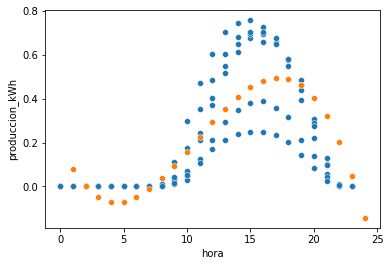

In [32]:
sns.scatterplot(data=df, x='hora' ,y='produccion_kWh')
sns.scatterplot(x=np.arange(1,25), y=y)

In [33]:
grafica = df.groupby(by='hora').mean()

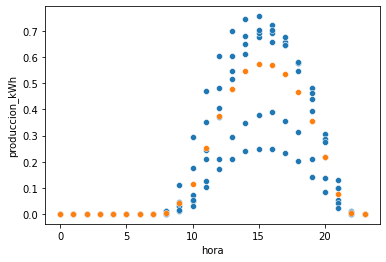

In [34]:
sns.scatterplot(data=df, x='hora' ,y='produccion_kWh')
sns.scatterplot(data=grafica, x=grafica.index ,y='produccion_kWh')